# A Week Away Problem Solving With Python Jupyter Coding

## All code, solutions, and methods are reserved for Jason Lu, 2021. Express usage of coding is forbidden outside of NC-SA Creative Commons licensing. 

Slide Decks Used From Episode 3 For Coding Solution Basis: 

https://docs.google.com/presentation/d/1kB6VzYhNo2jmF1sMcOErs40Ct-O1rDBHy3rr532hiBI/edit#slide=id.gded5babc34_0_70

### Problem Statement:

Kevin, Bailee and the Camp “Ageekaway” campers are sort of stuck in the COVID-19 pandemic, and they are just “bored AF” in Tik Tok millennial speak. So, to jazz things up, they decide to get ‘fancy’ like Tasty or Eaters and decide to make a campfire classic, S’mores. 
For this problem, we will explore three main data science and algorithm concepts:  graphs, confusion matrices, and precision / recall.


### Part A: Coding Solution For Graph Algorithms

As a reminder, here is the graph that we are running Dijkstra, Prim's, and Kruskal's graph algorithms on: 

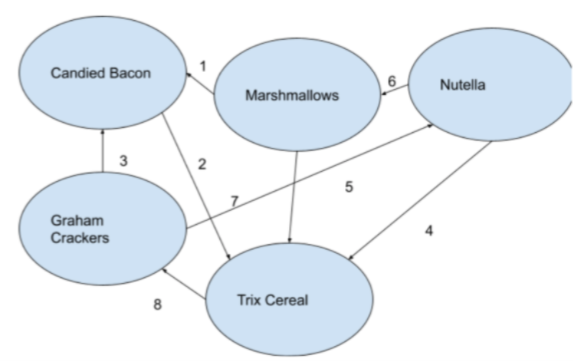

In [1]:
# Python library to display images for solution. 

from IPython.display import Image
Image("picture_graph.png")

#### Problem Statement: 

Little Dijkstra Review: Bailee decides to test the campers with a little graph problem, apply Prim, Dijkstra, and Kruskal's for the possible choices of toppings for the smores: candied bacon, ‘Trix’ cereal, caramel, chocolate [lots of chocolate], marshmallows, and the most ‘special’ ingredient: spicy hot sauce. Gotta bring a little spice in your post-grad life man.

Apply Dijkstra, Prim, and Kruskal Shortest Path Algorithms To The Following Graph, in the next three slides. 
The source is candied bacon, the sink is graham crackers. 

In [2]:
# Import NetworkX package. 
import sys
!{sys.executable} -m pip install networkx

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.


In [3]:
# Coding Solution (will be using the graph algorithm Python Library, numpy, and networkx). 
# Pro tip: Reuse code (of course with attribution) whenever you make similar solutions for coding.
# Don't re-invent the wheel. 

# Define the graph here (assume that it is pointing arrows with only 1 direction for Dijkstra.)
# Import Statements 
import networkx as nx
import numpy as np 
import tensorflow as tf

# Setup work, get the neural network graph abstraction working,
# the weights as edge values for NN. 
graph = nx.DiGraph()
# Nodes: 

# Candied Bacon (CB), Graham Crackers (GC), Trix Cereal (2), Nutella (N), Marshmallows (M)
# Adding in the adjacency matrix for edges. 

graph.add_edge("CB", "TC", capacity=2.0)
graph.add_edge("GC", "CB", capacity=3.0)
graph.add_edge("GC", "N", capacity=7.0)
graph.add_edge("TC", "CB", capacity=8.0)
graph.add_edge("N", "TC", capacity=4.0)
graph.add_edge("N", "M", capacity=6.0)
graph.add_edge("M", "CB", capacity=1.0)
graph.add_edge("M", "TC", capacity=5.0)

# Some attributes about the graph to print out. 
print(list(graph.nodes))
print(list(graph.edges))
print(len(graph))
# Important, connected components, for Dijkstra, Prim, Kruskal calculations. 
graph

['CB', 'TC', 'GC', 'N', 'M']
[('CB', 'TC'), ('TC', 'CB'), ('GC', 'CB'), ('GC', 'N'), ('N', 'TC'), ('N', 'M'), ('M', 'CB'), ('M', 'TC')]
5


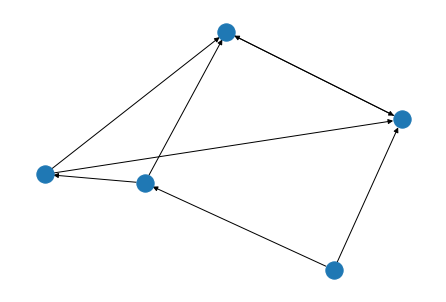

In [4]:
# Source (to draw the graph):
# https://networkx.org/documentation/stable/tutorial.html 

import matplotlib.pyplot as plt 

# Note: this is just an abstraction of the original graph, not drawn to scale. 
nx.draw(graph)
plt.show()

In [5]:
import sys 

# Source: https://www.educative.io/edpresso/how-to-implement-dijkstras-algorithm-in-python 
# We will modify the source code to fit our needs for the episode. 
def dijkstra(graph):
    global visited_and_distance
    v = -10
    # Choosing the vertex with the minimum distance
    for index in range(number_of_vertices):
        if visited_and_distance[index][0] == 0 \
            and (v < 0 or visited_and_distance[index][1] <= \
                visited_and_distance[v][1]):
                v = index
    return v

# Add in the adjacency matrix with our own graph. 
edges = [[0, 0, 2, 0, 0],
         [3, 0, 0, 7, 0],
         [8, 0, 0, 0, 0],
         [0, 0, 4, 0, 6],
         [1, 0, 5, 0, 0]]

vertices =  [[0, 1, 1, 0, 1],
             [1, 0, 1, 0, 0],
             [0, 1, 1, 0, 0],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 1, 0]]

number_of_vertices = len(vertices[0])

# The first element of the lists inside visited_and_distance 
# denotes if the vertex has been visited.
# The second element of the lists inside the visited_and_distance 
# denotes the distance from the source.
visited_and_distance = [[0, 0]]
for i in range(number_of_vertices-1):
    visited_and_distance.append([0, sys.maxsize])

for vertex in range(number_of_vertices):
    # Finding the next vertex to be visited.
    to_visit = dijkstra(graph)
    for neighbor_index in range(number_of_vertices):
    # Calculating the new distance for all unvisited neighbours
    # of the chosen vertex.
        if vertices[to_visit][neighbor_index] == 1 and visited_and_distance[neighbor_index][0] == 0:
            new_distance = visited_and_distance[to_visit][1] + edges[to_visit][neighbor_index]
        # Updating the distance of the neighbor if its current distance
        # is greater than the distance that has just been calculated
            if visited_and_distance[neighbor_index][1] > new_distance:
                visited_and_distance[neighbor_index][1] = new_distance
    # Visiting the vertex found earlier
    visited_and_distance[to_visit][0] = 1

# Extra print statement for debugging / checking the shortest path properly. 
for distance in visited_and_distance:
    """
    print("The shortest distance of ",chr(ord('a') + i),\
    " from the source vertex a is:",distance[1] + 10.0)
    i = i + 1
    """ 
    # multiply by 10 to ensure a positive integer.
    print("The shortest path distance is: " + str((distance[1] + (1 * 10))))


The shortest path distance is: 10
The shortest path distance is: 10
The shortest path distance is: 10
The shortest path distance is: 10
The shortest path distance is: 10


In [6]:
# Source: https://www.geeksforgeeks.org/prims-minimum-spanning-tree-mst-greedy-algo-5/
import sys # Library for INT_MAX

class Graph():

    def __init__(self, vertices):
        self.V = vertices
        # Create graph instance here. 
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][ parent[i]])

    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        min_index = 0

        # Initialize min value
        # Python 3 change to maxsize. 
        # Source: https://stackoverflow.com/questions/13795758/what-is-sys-maxint-in-python-3
        min = sys.maxsize

        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index

    # Function to construct and print MST for a graph represented using adjacency matrix representation
    def prims(self):

        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V

        parent[0] = -1 # First node is always the root of

        for cout in range(self.V):
            # Pick min distance vertex. 
            u = self.minKey(key, mstSet)

            # Put the minimum distance vertex in the shortest path tree
            mstSet[u] = True

            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shotest path tree
            for v in range(self.V):

                # If the vertex < MST, then update new parent neighboring nodes for Dijkstra. 
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        self.printMST(parent)

g = Graph(5)
# Replace with our own graph for adjacency list. 
g.graph = [[0, 2, 0, 0, 0],
         [1, 0, 3, 7, 5],
         [0, 6, 0, 0, 4],
         [0, 4, 0, 0, 6],
         [0, 8, 5, 0, 0]]

g.prims()

Edge 	Weight
0 - 1 	 1
1 - 2 	 6
1 - 3 	 4
2 - 4 	 5


### Warning 

Kruskal's Algorithm below requires that we don't run into any cycles, as shown from Episode 3! 

In [7]:
# Source: https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
"""
Python program for Kruskal's algorithm to find Minimum Spanning Tree of a given connected,
undirected and weighted graph
"""
from collections import defaultdict

# Class to represent a graph
class Graph:

    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # default dictionary to store graph

    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i: return i
        return self.find(parent, parent[i])

    # A function that does union of two sets of x and y
    # Union find strategy by ranks. 
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)

        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
             parent[yroot] = xroot

        # If ranks are same, then make one as root and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    # The main function to construct MST using Kruskal's algorithm
    def KruskalMST(self):

        result = [] # This will store the resultant MST
        # An index variable, used for sorted edges
        i = 0
        # An index variable, used for result[]
        e = 0

        # Step 1: Sort all the edges in non-decreasing order of their weight. If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,key=lambda item: item[2])

        parent = []
        rank = []

        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:

        # Step 2: Pick the smallest edge and increment the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # If including this edge does't cause cycle, include it in result and increment the 
            # index of result for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
        minimumCost = 0
        print ("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
            print("Minimum Spanning Tree" , minimumCost)

# Make graph instance to solve for Kruskal. 
g = Graph(4)
g.addEdge(0, 2, 10) # Edges from Candied Bacon to Trix Cereal. 
g.addEdge(0, 2, 6)  # Edges Nutella to Marshmallow. 
g.addEdge(1, 3, 5)  # Edges Graham Crackers to Candied Bacon.  
g.addEdge(1, 3, 15) # Edges from Trix Cereal to Graham Crackers and to Nutella. 
g.addEdge(2, 3, 7)  # Edges from Candied Bacon to Graham Crackers and to Trix Cereal. 

# Function call
g.KruskalMST()

Edges in the constructed MST
1 -- 3 == 5
Minimum Spanning Tree 5
0 -- 2 == 6
Minimum Spanning Tree 11
2 -- 3 == 7
Minimum Spanning Tree 18


### Note / Caveat: 

The above coding solutions are just one of many ways to implement Dijkstra, Prim, Kruskal's. The general point is to get the gist of the algorithms (Dijkstra: shortest paths, Prim's: Minimum Span Tree, Kruskal's: avoiding cycles in Minimum Spanning Trees) and then use that general understanding to code your own solution. The codes above are attributed to Geeks For Geeks as just an illustrative purpose of solving our problem for Episode 4. Ordinarily, if this was a LeetCode assessment challenge or interview problem, we would come with our own coding solution. That will be presented in a later episode. 

### Part B: All Pairs Shortest Paths Coding Solution 

#### Problem Statement: 

Using weighted all pairs shortest paths(APSP), calculate the edges total weightage from the previous graph.
Refresher of APSP below. 

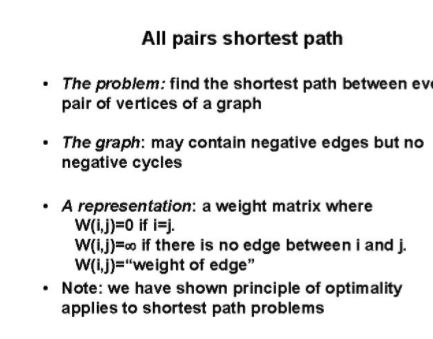

In [8]:
Image("picture_apsp.png")

### "Quick" Rundown of the Dynamic Programming Portion of the below coding solution: 

#### English Description: 

We want to find the shortest path $G_i$, from a possible set of paths n, where i <= n. 

#### Number of Subproblems: 

We will have up to n subproblems, given n possible paths. 

#### Bellman / Recursion (base cases already covered in the 'representation'):

#### Base Cases: 
W(i,j) = 0 if i = j
W(i,j) = inf if no edge between i and j 
W(i,j) represents the weight of the edge between vertices i and j, where it may be > 0. (Bellman-Ford will allow negative edge weights). 

#### Recursive Cases: 

W(i,j) = min(W(i,j), W(i,k) + W(k,j)), where k is the intermediary node between i and j.  

####  Subproblems Runtime:

Runtime for each subproblem: O(i*j), since we have to traverse all pairs of shortest paths between i,j. 

#### Final Runtime: 

Final runtime: O(i*j*n) = $O(n^{3})$. 

#### Final Solution: 

W(i,j) = min(W(i,n)), where n is all of the shortest paths that we have traversed. 

In [9]:
# APSP coding solution, using the same networkx graph abstraction, and with adjacency matrices. 
# Source: https://www.geeksforgeeks.org/floyd-warshall-algorithm-dp-16/
# Adjacency matrices.

# Python Program for Floyd Warshall Algorithm
 
# Number of vertices in the graph
V = 4
 
# Define infinity as the large
# enough value. This value will be
# used for vertices not connected to each other
INF = 99999
 
# Solves all pair shortest path
# via Floyd Warshall Algorithm

def apsp(graph):
 
    dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
    for k in range(V):
 
        # pick all vertices as source one by one
        for i in range(V):
 
            # Pick all vertices as destination for the
            # above picked source
            for j in range(V):
 
                # If vertex k is on the shortest path from
                # i to j, then update the value of dist[i][j]
                dist[i][j] = min(dist[i][j],
                                 dist[i][k] + dist[k][j]
                                 )
    printSolution(dist) 
# A utility function to print the solution.
def printSolution(dist):
    print("All Pairs Shortest Paths:")
    for i in range(V):
        for j in range(V):
            if(dist[i][j] == INF):
                print("%7s" % ("INF"))
            else:
                print("\tMatrix: ", dist[i][j])
            if j == V-1:
                print("")
 
 
# Driver program to test the above program
# Let us create the following weighted graph.
graph = [[0, 2, INF, INF, INF],
         [1, 0, 3, 7, 5],
         [0, 6, 0, INF, 4],
         [0, 4, INF, 0, 6],
         [0, 8, 5, INF, 0]]
# Print the solution
apsp(graph)

All Pairs Shortest Paths:
	Matrix:  0
	Matrix:  2
	Matrix:  5
	Matrix:  9

	Matrix:  1
	Matrix:  0
	Matrix:  3
	Matrix:  7

	Matrix:  0
	Matrix:  2
	Matrix:  0
	Matrix:  9

	Matrix:  0
	Matrix:  2
	Matrix:  5
	Matrix:  0



### Part C: Wrap Up

#### Problem Statement: 

Now, it is time to really stump your boi Kevin. Bailee increases the complexity and spice by now adding in confusion matrices. Here is a sample confusion matrix that she and her bestie Presley drew: the matrices represent each of the four “big groups” that are contained in the camp.

This matrix is different than in Episode 3, so that we can more properly appreciate how confusion matrices work. 

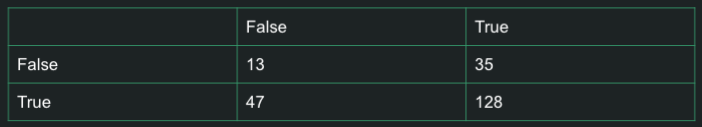

In [10]:
# The Matrix, for reference. 
Image("picture_matrix2.png")

In [11]:
# Import for the metrics. 
# We will compare F1 score calculation with manual and the library version, for any significant digit errors. 
# Also, import classification report as well, for a holistic view of data. 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [12]:
# Problem: Generate an 'abstraction' of the matrix to calculate the metrics. 
# Source: https://towardsdatascience.com/understanding-the-confusion-matrix-and-how-to-implement-it-in-python-319202e0fe4d
# Source #2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# Hard-coded given the values we have to match up the above confusion matrix. 
y_true = [1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 
          0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
matrix = confusion_matrix(y_true, y_pred)
print(matrix)

[[ 13  35]
 [ 47 128]]


### Part D: Wrap up, metrics calculation

Your job is straightforward, calculate the “metrics”: precision, recall, FP, FN, TP, TN, accuracy, and if you really want to get serious about the matrices: F1 Score as well. Show your work.

In [13]:
# Calculate the metrics. 

from sklearn.metrics import accuracy_score

# Function to calculate true positives, false positives, true negatives, false negatives. 
# Source: https://stackoverflow.com/questions/31324218/
# scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal
def performance(y_actual, y_hat):
    truePositive = 0
    falsePositive = 0
    trueNegative = 0
    falseNegative = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            truePositive += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            falsePositive += 1
        if y_actual[i]==y_hat[i]==0:
            trueNegative += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            falseNegative += 1

    print("Confusion matrix true positive: " + str(float(truePositive)))
    print("Confusion matrix false positive: " + str(float(falsePositive)))
    print("Confusion matrix true negative: " + str(float(trueNegative)))
    print("Confusion matrix false negative: " + str(float(falseNegative)))

# Note: These values will work for any n*n null-rank matrix, however, it 
# may not work for matrices with determinants of 0. 
def accuracy():
    print("Confusion matrix accuracy: " + str(accuracy_score(y_true, y_pred)))
    
def precision():
    # Add in micro so that we have a small-scale sample for the precision score. 
    print("Confusion matrix precision: " + str(precision_score(y_true, y_pred,average='micro')))
    
def recall():
    # Add in micro so that we have a small-scale sample for the precision score. 
    print("Confusion matrix recall: " + str(recall_score(y_true, y_pred,average='micro')))

# Calculate F1-score two ways, and find their marginal difference. 
def f1score():
    f1_emp = f1_score(y_true, y_pred, average='micro')
    print("Confusion matrix F1-score (empirical)" + str(f1_emp))
    # Calculate F1-score second way, manually. 
    # Not recommended to have the line this long, so we will split into segmented lines. 
    precision = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    f1_calc = 2 * (precision * recall) / (precision + recall)
    print("Confusion matrix F1_score (calculated)" + str(f1_calc))
    # Calculate their differences.
    diff = abs(f1_emp - f1_calc)
    print("The absolute difference of F1 score is: " + str(float(diff)))
    
# Print classification report. 
def report():
    print("Confusion matrix report: \n" + classification_report(y_true, y_pred))

In [14]:
# Report may result in dividing by 0, use warning suppression here. 
# Best practice is not do this, but in this episode, some metric values might be slightly off due to rounding error. 
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Call all functions here. 
accuracy()
precision()
recall()
performance(y_true, y_pred)
f1score()
report()

Confusion matrix accuracy: 0.6322869955156951
Confusion matrix precision: 0.6322869955156951
Confusion matrix recall: 0.6322869955156951
Confusion matrix true positive: 128.0
Confusion matrix false positive: 35.0
Confusion matrix true negative: 13.0
Confusion matrix false negative: 47.0
Confusion matrix F1-score (empirical)0.6322869955156951
Confusion matrix F1_score (calculated)0.6322869955156951
The absolute difference of F1 score is: 0.0
Confusion matrix report: 
              precision    recall  f1-score   support

           0       0.22      0.27      0.24        48
           1       0.79      0.73      0.76       175

    accuracy                           0.63       223
   macro avg       0.50      0.50      0.50       223
weighted avg       0.66      0.63      0.65       223



### Epilogue 

The results show that indeed some confusion matrices can be inaccurate slightly with error, as we did not factor that some of the significant digits may have changed during the F1-score calculation, given that we didn't specify a Python rounding result. 